Pandas: piviot_table

In [2]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt

#reading the csv file
data = pd.read_csv(r"C:\Users\nikhi\Downloads\data_jobs.csv")

# data cleanup
data['job_posted_date'] = pd.to_datetime(data['job_posted_date'])

Counts of job Titles

In [8]:
# pivot_table is some kind of similar to GROUPBY() function but piviot_table is more advance than the GROUPBY()

data.pivot_table(values='salary_year_avg', index= 'job_country', columns ='job_title_short', aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [10]:
# now we are ploting the graph of top 6 countries with median salary by job titles
#  first lets findout which top 6 countries are there

top_countries = data['job_country'].value_counts().head(6).index

top_countries


Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

In [17]:
top_countries = data['job_country'].value_counts().head(6).index

df_job_country_salary = data.pivot_table(
    values = 'salary_year_avg',
    index = 'job_country',
    columns = 'job_title_short',
    aggfunc = 'median'
)    

df_job_country_salary = df_job_country_salary.loc[top_countries]

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary


job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
Spain,91977.0,133000.0,88128.0


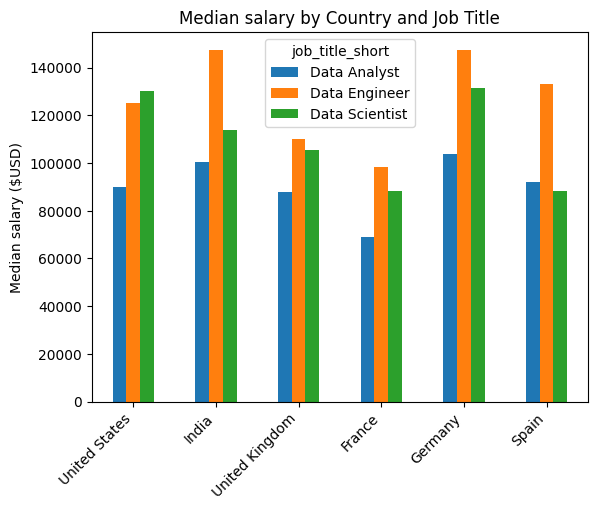

In [22]:
# now plotting our results in Graph

df_job_country_salary.plot(kind = 'bar')
plt.ylabel('Median salary ($USD)')
plt.xlabel('')
plt.title('Median salary by Country and Job Title')
plt.xticks(rotation=45, ha='right')
plt.show()